# Imports

In [9]:
import re
import pandas as pd
import numpy as np
import unidecode

import seaborn as sns
import matplotlib.pyplot as plt

# Silence warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

# Basic morphological stats

In [10]:
def count_words(text):
    ''' Returns the word (i.e. type) count for a given text.
    
    Input:
        text(str)
    
    Output:
        count_words(pandas DataFrame): return the count for each word
    '''
        
    words = re.split('[\s\.,·:;\'—«»*’]', text)
    count_words = pd.Series(words).value_counts()
    
    count_words = pd.DataFrame(count_words).rename(columns = {0:'count'})
    
    length = []
    
    for word in count_words.index:
        length.append(len(word))
        
    count_words['length'] = length
    
    return count_words

In [11]:
def read_txt(name):
    
    f = open("txt/" + name + ".txt", "r")
    text = f.read()
    f.close()
    
    return text

In [12]:
def total_words(text):
    
    words = re.split('[\s\.,·:;\'—«»*’]', text)
    total = []
    
    for word in words:
        if len(word) > 0:
            total.append(word)
            
    return len(total)

In [13]:
def get_metrics(text):
    
    print(len(text), 'total characters,',
          total_words(text), 'total words,',
          len(count_words(text)), 'unique words')

In [14]:
lycurgus_lem = read_txt('lycurgus_lem')
get_metrics(lycurgus_lem)

70132 total characters, 10961 total words, 3274 unique words


In [15]:
lycurgus = read_txt('lycurgus')
get_metrics(lycurgus)

70597 total characters, 10961 total words, 3521 unique words


In [16]:
hesiode_lem = read_txt('hesiode_lem')
get_metrics(hesiode_lem)

108334 total characters, 16476 total words, 6254 unique words


In [17]:
hesiode = read_txt('hesiode')
get_metrics(hesiode)

105636 total characters, 16476 total words, 6793 unique words


In [18]:
aristides_lem = read_txt('aristides_lem')
get_metrics(aristides_lem)

999768 total characters, 160906 total words, 22540 unique words


In [19]:
aristides = read_txt('aristides')
get_metrics(aristides)

996103 total characters, 160906 total words, 25072 unique words


In [20]:
aristotle_lem = read_txt('aristotle_lem')
get_metrics(aristotle_lem)

167746 total characters, 28144 total words, 5721 unique words


In [21]:
aristotle = read_txt('aristotle')
get_metrics(aristotle)

168308 total characters, 28144 total words, 6169 unique words


In [22]:
antiphon_lem = read_txt('antiphon_lem')
get_metrics(antiphon_lem)

114181 total characters, 18148 total words, 4207 unique words


In [23]:
antiphon = read_txt('antiphon')
get_metrics(antiphon)

113194 total characters, 18148 total words, 4630 unique words


In [24]:
thucydides_lem = read_txt('thucydides_lem')
get_metrics(thucydides_lem)

1014692 total characters, 155478 total words, 16331 unique words


In [25]:
thucydides = read_txt('thucydides')
get_metrics(thucydides)

1004796 total characters, 155478 total words, 17833 unique words


In [26]:
iliad_Homer_lem = read_txt('iliad_Homer_lem')
get_metrics(iliad_Homer_lem)

690268 total characters, 111861 total words, 19545 unique words


In [27]:
iliad_Homer = read_txt('iliad_Homer')
get_metrics(iliad_Homer)

690461 total characters, 111861 total words, 21625 unique words


In [28]:
odyssey_Homer_lem = read_txt('odyssey_Homer_lem')
get_metrics(odyssey_Homer_lem)

545130 total characters, 87519 total words, 15916 unique words


In [29]:
odyssey_Homer = read_txt('odyssey_Homer')
get_metrics(odyssey_Homer)

540742 total characters, 87519 total words, 17611 unique words


In [30]:
iliad_RL = read_txt('iliad_RL')
get_metrics(iliad_RL)

967251 total characters, 181418 total words, 8717 unique words


In [31]:
iliad_KK = read_txt('iliad_KK')
get_metrics(iliad_KK)

888705 total characters, 153200 total words, 16858 unique words


In [32]:
oral = read_txt('oral')
get_metrics(oral)

1179894 total characters, 190015 total words, 28585 unique words


In [33]:
oral_lem = read_txt('oral_lem')
get_metrics(oral_lem)

1184081 total characters, 190013 total words, 25689 unique words


In [34]:
written = read_txt('written')
get_metrics(written)

1278740 total characters, 200098 total words, 27411 unique words


In [35]:
written_lem = read_txt('written_lem')
get_metrics(written_lem)

1290772 total characters, 200096 total words, 24985 unique words


# Type-token ratio

In [36]:
def type_token_ratio(text, tokens = 1000):
    ''' Compute the type-token ratio (TTK) of a text, on n samples of same token length.
    
    Inputs:
        text(str): text/corpus
        n_sample(int): number of repeated measures
        tokens(int): number of tokens (words) of each TTK measure
    
    Output:
        type_token_ratio(list<float>): list of the TTK measures
    '''
    
    words_ = re.split('[\s\.,·:;\'—«»*’]', text)
    words, type_token_ratio = [], []
    
    for word_ in words_:
        if word_ != '':
            words.append(word_)
            
    n_sample = len(words) // tokens
    
    for n in range(n_sample):
        
        sample = words[n: n+tokens]
        
        text = ''
        for word in sample:
            text += word + ' '
                    
        text = text[:-1]
        
        type_ = len(count_words(text)) - 1
        type_token_ratio.append(type_ / tokens)
        
    return type_token_ratio

In [37]:
TTR_iliad_Homer = type_token_ratio(iliad_Homer, tokens = 500)
TTR_iliad_KK = type_token_ratio(iliad_KK, tokens = 500)
TTR_iliad_RL = type_token_ratio(iliad_RL, tokens = 500)

In [38]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("ticks")
sns.set_context("paper", font_scale=2)                                                  

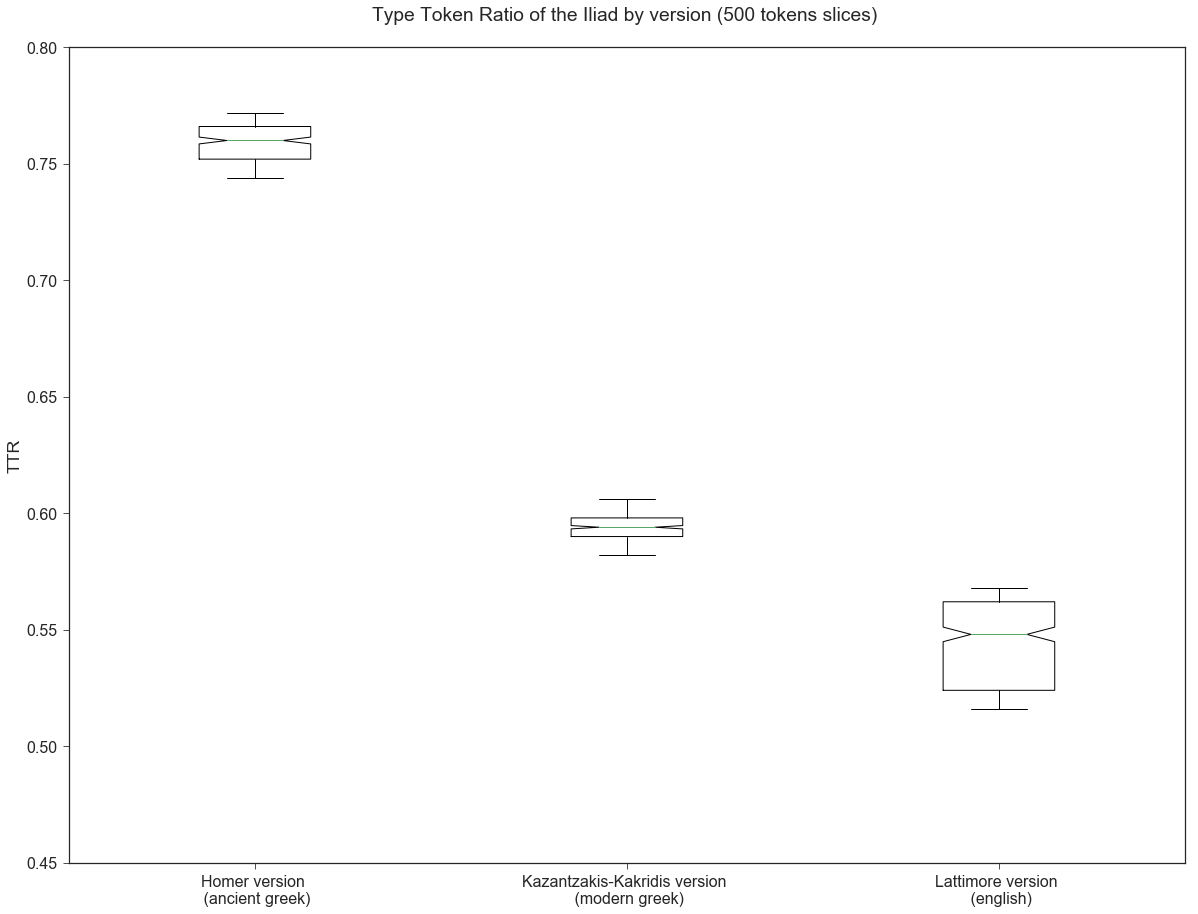

In [39]:
plt.boxplot([TTR_iliad_Homer, TTR_iliad_KK, TTR_iliad_RL], notch = True);

plt.xticks([1,2,3], np.array(['Homer version \n (ancient greek)', 
                              'Kazantzakis-Kakridis version \n (modern greek)', 
                              'Lattimore version \n (english)']))
plt.ylabel('TTR');
plt.ylim((.45,.8))
plt.title('Type Token Ratio of the Iliad by version (500 tokens slices) \n');
plt.show()

In [58]:
TTR_Homer = type_token_ratio(iliad_Homer + odyssey_Homer, tokens = 500)
TTR_hesiode = type_token_ratio(hesiode, tokens = 500)
TTR_lycurgus = type_token_ratio(lycurgus, tokens = 500)

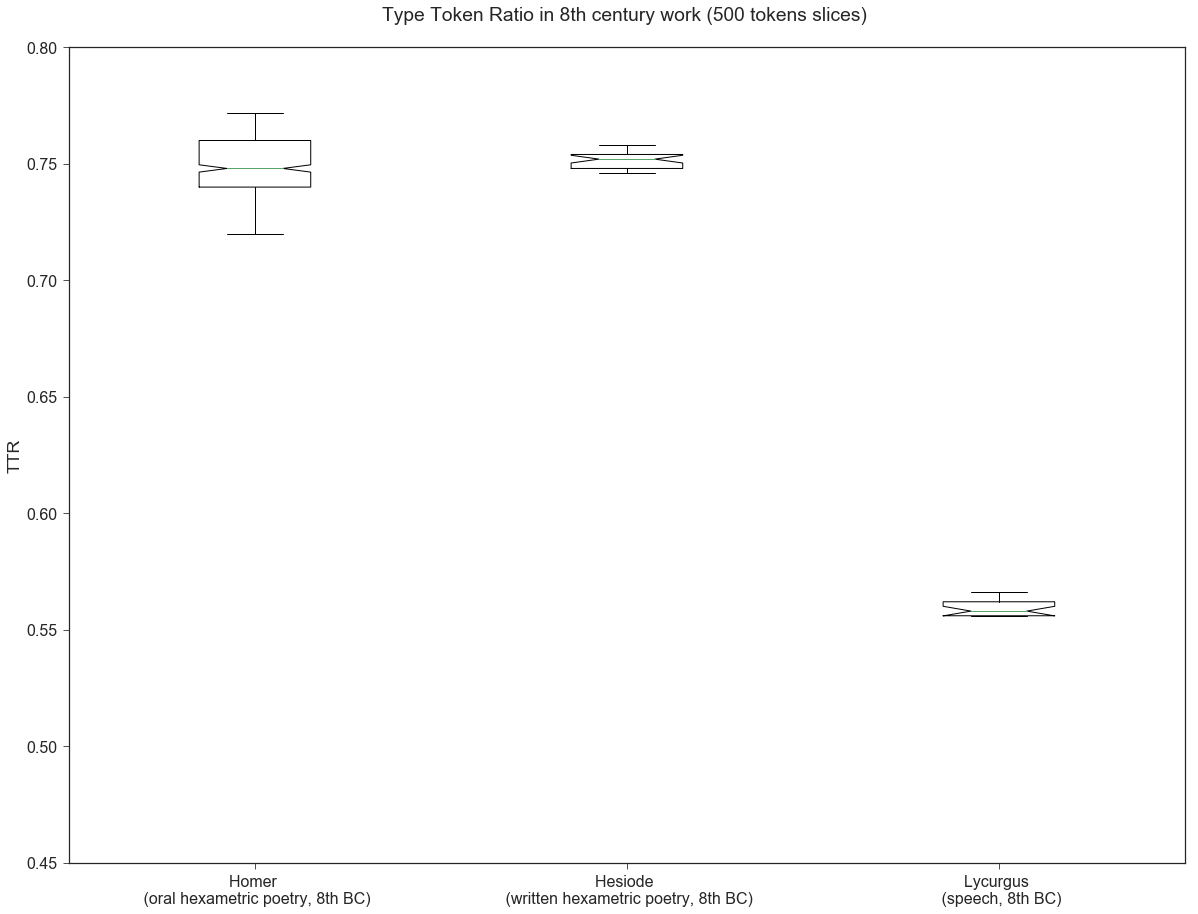

In [55]:
plt.boxplot([TTR_Homer, TTR_hesiode, TTR_lycurgus], notch = True);

plt.xticks([1,2,3], np.array(['Homer \n (oral hexametric poetry, 8th BC)',
                                'Hesiode \n (written hexametric poetry, 8th BC)', 
                                'Lycurgus \n (speech, 8th BC)']))
plt.ylabel('TTR');
plt.ylim((.45,.8))
plt.title('Type Token Ratio in 8th century work (500 tokens slices) \n ');
plt.show()

In [59]:
TTR_oral = type_token_ratio(oral_lem, tokens = 500)
TTR_written = type_token_ratio(written_lem, tokens = 500)

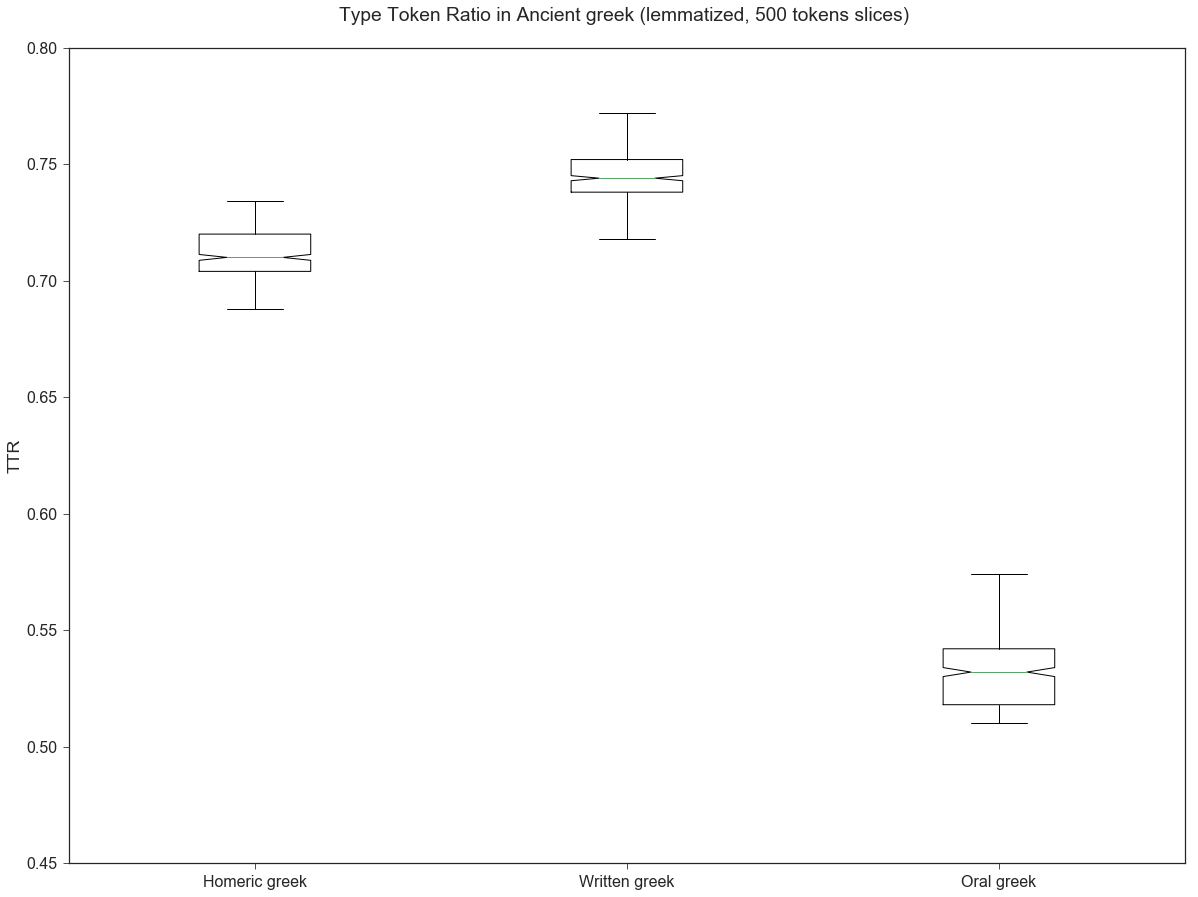

In [60]:
plt.boxplot([TTR_Homer, TTR_written, TTR_oral], notch = True);

plt.xticks([1,2,3], np.array(['Homeric greek',
                             'Written greek',
                             'Oral greek']))
plt.ylabel('TTR');
plt.ylim((.45,.8))
plt.title('Type Token Ratio in Ancient greek (lemmatized, 500 tokens slices) \n ');
plt.show()